# Uber Business Travel Analysis – Key Insights

## 1 Overview of the Dataset
- The dataset consists of **1,155 Uber trips**, primarily for **business purposes (~93%)**.
- Trips contain details on **start & stop locations, distances, duration, categories (business/personal), and purposes**.
- **Major issues found:**  
  - **"Unknown Location"** appears frequently as a trip origin/destination.  
  - **104 trips under 2 miles with no recorded purpose** (potential wasteful rides).  

---

## 2 Time-Based Analysis
### Trips by Hour of the Day**
- **Peak hours:** **3-5 PM**, with most trips happening between **10 AM – 8 PM**.
- **Early morning (before 6 AM) and late-night (after 10 PM) trips are rare.**
- **Insight:** The dataset aligns with **standard business hours**, confirming Uber’s role in corporate mobility.

### Trips by Day of the Week**
- **Friday is the busiest day** for Uber travel.
- **Monday and Tuesday also have high trip volumes**, while **weekends see longer trips**.
- **Insight:** Business travel peaks **towards the weekend**, possibly due to last-minute meetings before the weekend.

### Total Miles Per Month**
- **High mileage in March and November (~1,800 miles)**, **low in May and September (~500 miles)**.
- **Insight:** Seasonal spikes suggest **business activity is higher at the end of financial quarters**.

---

## 3 Location-Based Insights
###  **Top Trip Origins & Destinations**
- **Most trips start from Cary (~200 trips)** and **Morrisville (~150 trips)**.
- **“Unknown Location” appears frequently (~148 trips).**
- **Insight:** If "Unknown Location" represents an airport or business hub, this could indicate high demand for rides there. Further investigation needed.

###  **Most Frequent Routes**
- **Most common route:** "Unknown Location ➜ Unknown Location" (~90 trips).
- Other high-volume routes: **Cary ➜ Morrisville, Morrisville ➜ Cary, Cary ➜ Durham**.
- **Insight:** Frequent travel **within short city distances** suggests Uber is **used for local business commutes**.

---

## 4 Business vs. Personal Travel Insights
### Business Trips Dominate**
- **Business trips:** **1,078 trips (~93%)**
- **Personal trips:** **77 trips (~7%)**
- **Insight:** The dataset is **strongly business-focused**, indicating Uber’s primary use for corporate travel.

### Trip Distance Comparison**
- **Business trips:** **10.65 miles avg.**
- **Personal trips:** **9.32 miles avg.**
- **Insight:** Business travelers cover **slightly longer distances** on average than personal users.

### Long-Distance & Short-Distance Trips**
- **Longest trip:** **Latta ➜ Jacksonville (310.3 miles, Business, Customer Visit)**.
- **Shortest trips:** **0.5 miles** (Errands/Supplies).
- **Insight:**  
  - **Long trips may not be cost-efficient.** Businesses should explore **flights or rental cars** for intercity travel.
  - **104 trips under 2 miles** could be **unnecessary or inefficient**.

---

## 5 Cost & Efficiency Analysis
### **Estimated Cost Per Mile**
- **Flat rate of $1.50 per mile across all trips.**
- **No surge pricing detected in dataset.**
- **Insight:** This suggests Uber was **operating on corporate fixed rates**, rather than using real-time surge pricing.

### **Longest Duration Trips**
- **Latta ➜ Jacksonville (330 min), Morrisville ➜ Banner Elk (206 min), Boone ➜ Cary (185 min).**
- **Insight:** These routes are **highly inefficient for business travelers** and **alternative transport (flights, car rentals) should be considered**.

### **Unproductive Short Trips**
- **104 trips were under 2 miles with no recorded purpose.**
- **Insight:**  
  - Many **could have been walking-distance trips**.
  - Some might indicate **canceled or idle rides**.
  - **Businesses should investigate these trips to reduce unnecessary expenses**.

---

## 6 Additional Deep Dive Findings
### **Slowest Trips & Traffic Congestion**
- Some trips had **extremely slow speeds (~4-6 mph)**, especially those **starting from 'Unknown Location'**.
- **Insight:** This suggests possible **traffic congestion, high waiting times, or inefficient routes**.

### **Weekend Trips Are Longer**
- **Friday & Saturday trips are longest (~27 min), Monday is shortest (~19 min).**
- **Insight:** Longer weekend trips suggest **business travelers extending work trips into the weekend or using Uber for leisure travel**.

---

#  **Final Recommendations
### **For Business Travelers & Companies**
1. **Optimize long business routes** (e.g., Latta ➜ Jacksonville, Morrisville ➜ Banner Elk) by considering **flights or rental cars** instead.
2. **Investigate & reduce short, unproductive trips (<2 miles)** to cut unnecessary Uber expenses.
3. **Analyze if weekend Uber trips are valid business expenses** or if they’re mixing with personal travel.

### **For Uber & Ride-Sharing Optimization**
4. **"Unknown Location" should be investigated**—if it’s an airport or business hub, Uber could optimize driver availability there.
5. **Analyze Uber usage at peak hours**—potential to introduce **ride-pooling options for frequent business routes**.
6. **Companies can explore ride subscription plans** to lower costs for regular Uber business users.

In [2]:
import pandas as pd
file_path = r"C:\Users\DELL\Downloads\UberDataset.xlsx"
df = pd.read_excel(file_path)
print(df.head())

            START_DATE            END_DATE  CATEGORY        START  \
0  2016-01-01 21:11:00 2016-01-01 21:17:00  Business  Fort Pierce   
1  2016-01-02 01:25:00 2016-01-02 01:37:00  Business  Fort Pierce   
2  2016-01-02 20:25:00 2016-01-02 20:38:00  Business  Fort Pierce   
3  2016-01-05 17:31:00 2016-01-05 17:45:00  Business  Fort Pierce   
4  2016-01-06 14:42:00 2016-01-06 15:49:00  Business  Fort Pierce   

              STOP  MILES          PURPOSE  
0      Fort Pierce    5.1   Meal/Entertain  
1      Fort Pierce    5.0              NaN  
2      Fort Pierce    4.8  Errand/Supplies  
3      Fort Pierce    4.7          Meeting  
4  West Palm Beach   63.7   Customer Visit  


In [5]:
df = df[df['START_DATE'] != 'Totals']

df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce')

df['END_DATE'] = pd.to_datetime(df['END_DATE'], errors='coerce')

df_cleaned = df.dropna(subset=['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP'])

df_cleaned.head()


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [6]:
print(df_cleaned.info())
print(df_cleaned.describe())
print(df_cleaned.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     653 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.2+ KB
None
                          START_DATE                       END_DATE  \
count                           1155                           1155   
mean   2016-07-16 23:44:33.402597376  2016-07-17 00:07:47.999999744   
min              2016-01-01 21:11:00            2016-01-01 21:17:00   
25%              2016-04-01 02:10:00            2016-04-01 02:35:00   
50%              2016-07-21 17:17:0

In [7]:
df_cleaned['YEAR'] = df_cleaned['START_DATE'].dt.year
df_cleaned['MONTH'] = df_cleaned['START_DATE'].dt.month_name()
df_cleaned['WEEKDAY'] = df_cleaned['START_DATE'].dt.day_name()
df_cleaned['HOUR'] = df_cleaned['START_DATE'].dt.hour

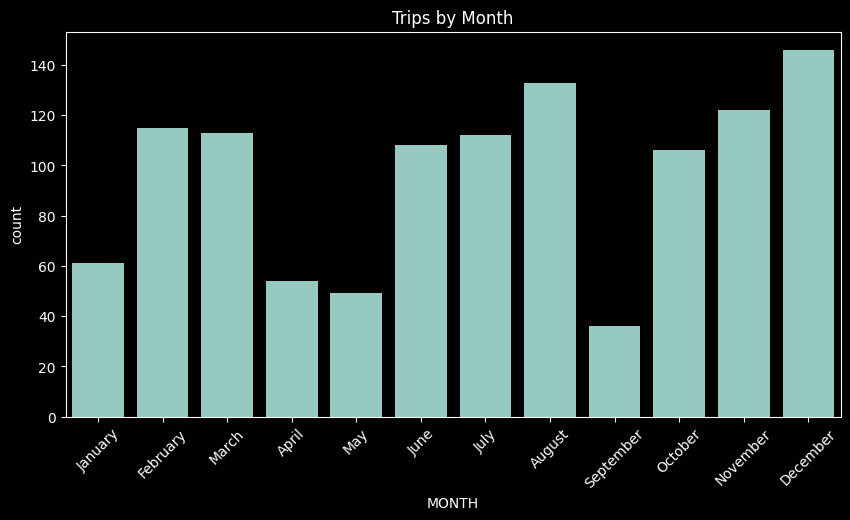

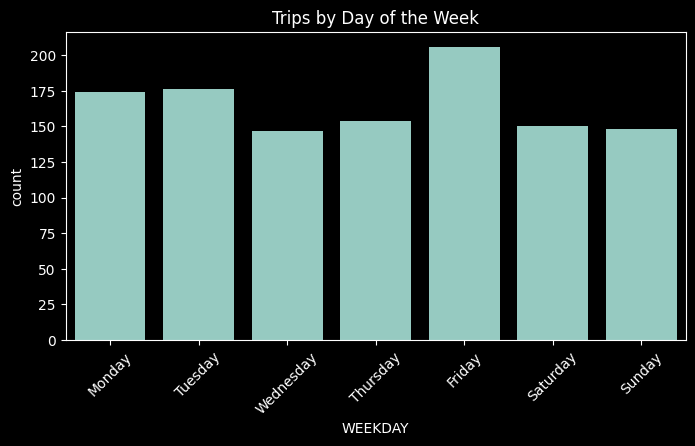

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.countplot(data=df_cleaned, x='MONTH', order=[
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'])
plt.title("Trips by Month")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8,4))
sns.countplot(data=df_cleaned, x='WEEKDAY', order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Trips by Day of the Week")
plt.xticks(rotation=45)
plt.show()
plt.style.use("dark_background")

C:\Users\DELL\AppData\Local\Temp\ipykernel_6628\2811721781.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_trend = df_cleaned.set_index('START_DATE').resample('M')['MILES'].sum()


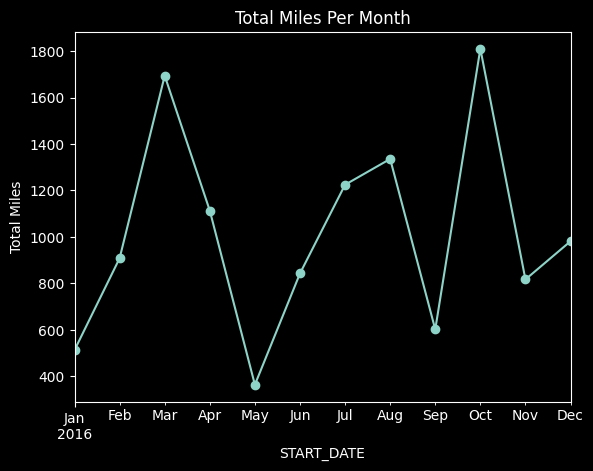

In [42]:
monthly_trend = df_cleaned.set_index('START_DATE').resample('M')['MILES'].sum()
monthly_trend.plot(marker='o', title='Total Miles Per Month')
plt.ylabel("Total Miles")
plt.show()

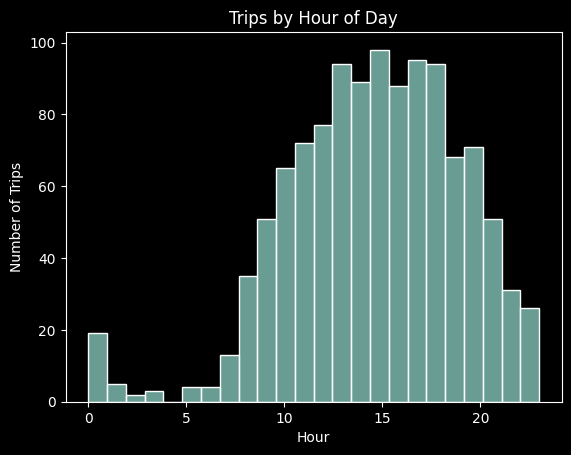

In [38]:
sns.histplot(df_cleaned['HOUR'], bins=24, kde=False)
plt.title("Trips by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Trips")
plt.show()

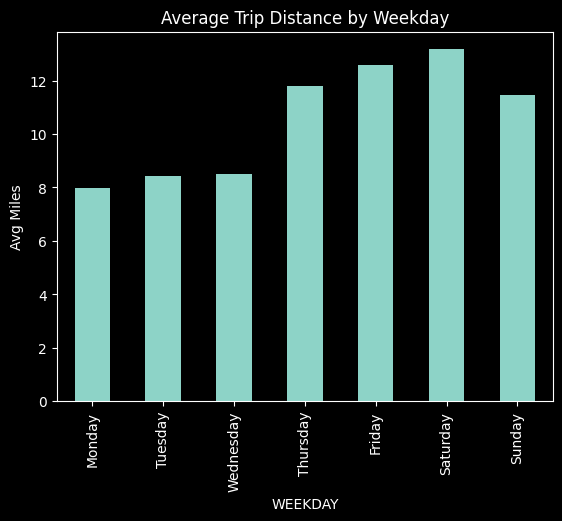

In [41]:
df_cleaned.groupby("WEEKDAY")["MILES"].mean().reindex([
    'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'
]).plot(kind='bar', title='Average Trip Distance by Weekday')
plt.ylabel("Avg Miles")
plt.show()

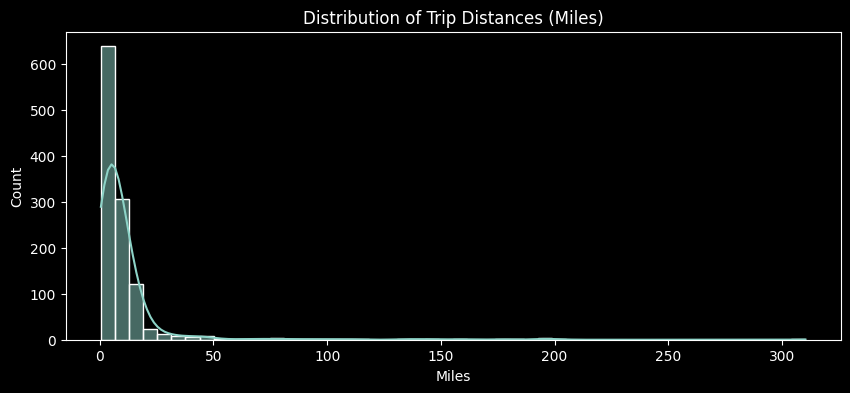

Longest Trip:
              START_DATE            END_DATE  CATEGORY  START          STOP  \
269 2016-03-25 16:52:00 2016-03-25 22:22:00  Business  Latta  Jacksonville   

     MILES         PURPOSE  YEAR  MONTH WEEKDAY  HOUR  
269  310.3  Customer Visit  2016  March  Friday    16  

Shortest Trip:
              START_DATE            END_DATE  CATEGORY       START        STOP  \
44  2016-01-26 17:27:00 2016-01-26 17:29:00  Business        Cary        Cary   
120 2016-02-17 16:38:00 2016-02-17 16:43:00  Business  Katunayaka  Katunayaka   
420 2016-06-08 17:16:00 2016-06-08 17:18:00  Business        Soho     Tribeca   

     MILES          PURPOSE  YEAR     MONTH    WEEKDAY  HOUR  
44     0.5  Errand/Supplies  2016   January    Tuesday    17  
120    0.5  Errand/Supplies  2016  February  Wednesday    16  
420    0.5  Errand/Supplies  2016      June  Wednesday    17  


In [11]:
plt.figure(figsize=(10,4))
sns.histplot(df_cleaned['MILES'], bins=50, kde=True)
plt.title("Distribution of Trip Distances (Miles)")
plt.xlabel("Miles")
plt.show()

longest = df_cleaned[df_cleaned['MILES'] == df_cleaned['MILES'].max()]
shortest = df_cleaned[df_cleaned['MILES'] == df_cleaned['MILES'].min()]
print("Longest Trip:\n", longest)
print("\nShortest Trip:\n", shortest)

- Most trips are below 10 miles, but a few outliers exceed 100 miles.
- Insight: The dataset is skewed toward shorter trips, but a small portion of rides are long-distance business trips.

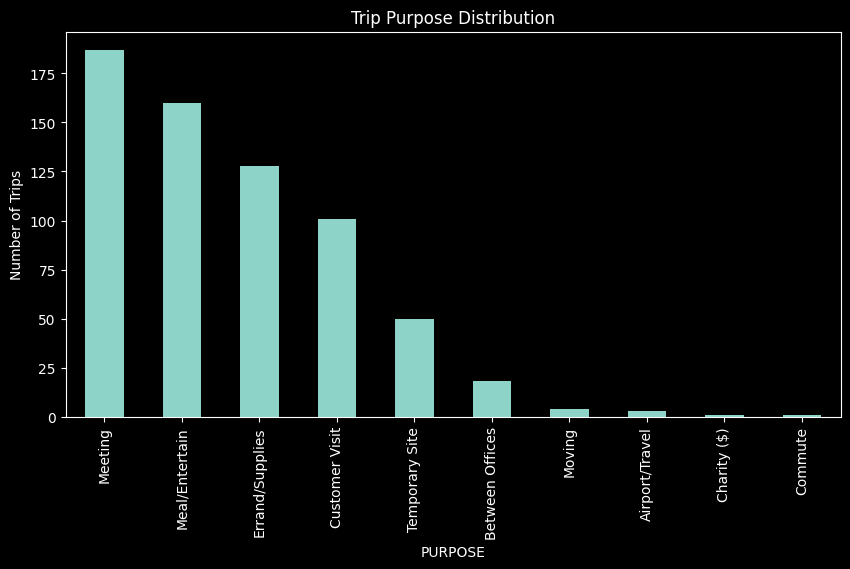

In [39]:
df_purpose = df_cleaned.dropna(subset=['PURPOSE'])
purpose_counts = df_purpose['PURPOSE'].value_counts()
purpose_counts.plot(kind='bar', figsize=(10,5), title='Trip Purpose Distribution')
plt.ylabel("Number of Trips")
plt.show()

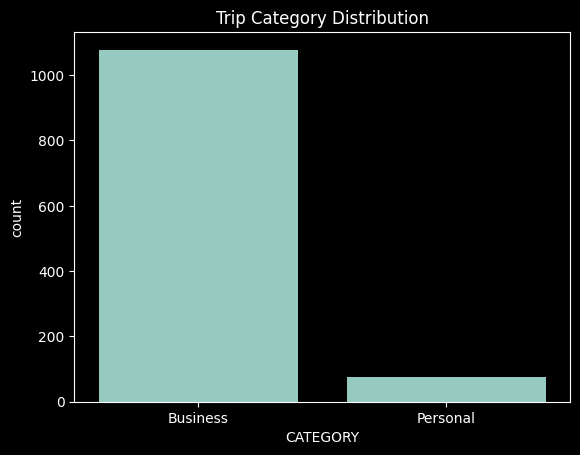

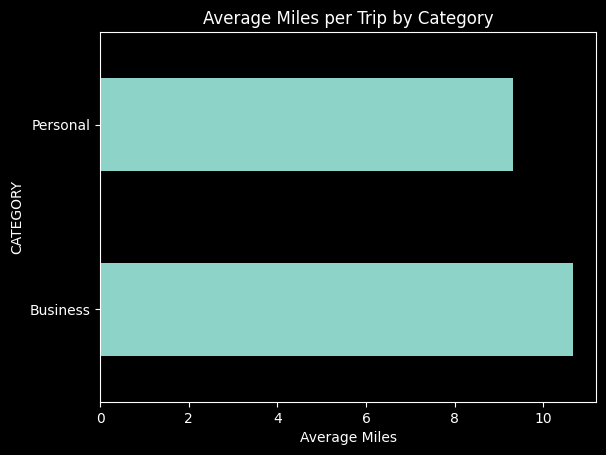

In [12]:
sns.countplot(data=df_cleaned, x='CATEGORY')
plt.title("Trip Category Distribution")
plt.show()

df_cleaned.groupby('CATEGORY')['MILES'].mean().plot(kind='barh', title='Average Miles per Trip by Category')
plt.xlabel("Average Miles")
plt.show()


In [40]:
df_cleaned.groupby("CATEGORY")["MILES"].agg(["count", "mean", "max", "sum"])

,count,mean,max,sum
CATEGORY,,,,
Business,1078,10.655844,310.3,11487.0
Personal,77,9.320779,180.2,717.7


In [13]:
print("Top Start Locations:\n", df_cleaned['START'].value_counts().head(10))
print("\nTop Stop Locations:\n", df_cleaned['STOP'].value_counts().head(10))

Top Start Locations:
 START
Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Durham               37
Lahore               36
Raleigh              28
Kar?chi              27
Westpark Place       17
Name: count, dtype: int64

Top Stop Locations:
 STOP
Cary                203
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
Durham               36
Lahore               36
Raleigh              29
Kar?chi              26
Apex                 17
Name: count, dtype: int64


In [16]:
top_10_longest = df_cleaned.sort_values(by="MILES", ascending=False).head(10)
top_10_longest[["START_DATE", "START", "STOP", "MILES", "CATEGORY", "PURPOSE"]]

,START_DATE,START,STOP,MILES,CATEGORY,PURPOSE
269,2016-03-25 16:52:00,Latta,Jacksonville,310.3,Business,Customer Visit
270,2016-03-25 22:54:00,Jacksonville,Kissimmee,201.0,Business,Meeting
881,2016-10-30 15:22:00,Asheville,Mebane,195.9,Business,NaN
776,2016-09-27 21:01:00,Unknown Location,Unknown Location,195.6,Business,NaN
546,2016-07-14 16:39:00,Morrisville,Banner Elk,195.3,Business,NaN
559,2016-07-17 12:20:00,Boone,Cary,180.2,Personal,Commute
297,2016-04-02 19:38:00,Jacksonville,Ridgeland,174.2,Business,Customer Visit
299,2016-04-03 02:00:00,Florence,Cary,159.3,Business,Meeting
727,2016-08-27 16:15:00,Unknown Location,Unknown Location,156.9,Business,NaN
268,2016-03-25 13:24:00,Cary,Latta,144.0,Business,Customer Visit


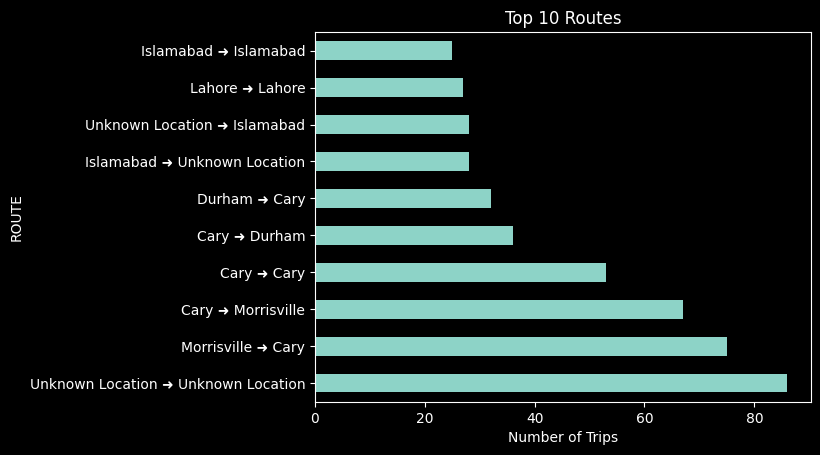

In [19]:
df_cleaned["ROUTE"] = df_cleaned["START"] + " ➜ " + df_cleaned["STOP"]
top_routes = df_cleaned["ROUTE"].value_counts().head(10)
top_routes.plot(kind="barh", title="Top 10 Routes")
plt.xlabel("Number of Trips")
plt.show()

In [32]:
df_unknown = df_cleaned[df_cleaned['START'] == 'Unknown Location']
df_unknown['STOP'].value_counts().head(10)  

STOP
Unknown Location    86
Islamabad           28
R?walpindi           9
Lahore               9
Kar?chi              6
Noorpur Shahan       4
Rawalpindi           3
Colombo              2
Morrisville          1
Name: count, dtype: int64

C:\Users\DELL\AppData\Local\Temp\ipykernel_6628\2219315642.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  business_trips['ROUTE'] = business_trips['START'] + " ➜ " + business_trips['STOP']


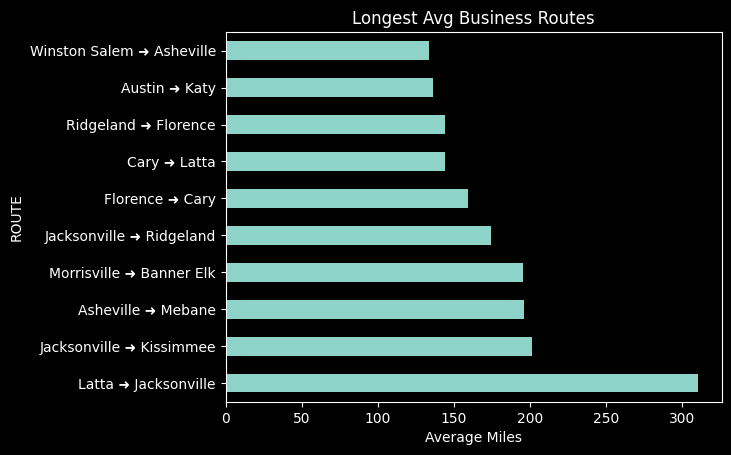

In [21]:
business_trips = df_cleaned[df_cleaned['CATEGORY'] == 'Business']

business_trips['ROUTE'] = business_trips['START'] + " ➜ " + business_trips['STOP']
inefficient_routes = business_trips.groupby('ROUTE')['MILES'].mean().sort_values(ascending=False).head(10)

inefficient_routes.plot(kind='barh', title='Longest Avg Business Routes')
plt.xlabel("Average Miles")
plt.show()


In [23]:
waste_trips = df_cleaned[(df_cleaned['MILES'] <= 2) & (df_cleaned['PURPOSE'].isnull())]
print(f" {len(waste_trips)} potentially unproductive trips found under 2 miles with no purpose")

 104 potentially unproductive trips found under 2 miles with no purpose


In [34]:
df_cleaned['COST_PER_MILE'] = df_cleaned['ESTIMATED_COST'] / df_cleaned['MILES']
df_cleaned[['MILES', 'COST_PER_MILE']].describe()

,MILES,COST_PER_MILE
count,1155.000000,1.155000e+03
mean,10.566840,1.500000e+00
std,21.579106,1.095697e-16
min,0.500000,1.500000e+00
25%,2.900000,1.500000e+00
50%,6.000000,1.500000e+00
75%,10.400000,1.500000e+00
max,310.300000,1.500000e+00


In [25]:
df_cleaned['DURATION_MIN'] = (df_cleaned['END_DATE'] - df_cleaned['START_DATE']).dt.total_seconds() / 60
df_cleaned['SPEED_MPH'] = df_cleaned['MILES'] / (df_cleaned['DURATION_MIN'] / 60)

slow_trips = df_cleaned[df_cleaned['SPEED_MPH'] < 10].sort_values(by='DURATION_MIN', ascending=False).head(10)
slow_trips[['START_DATE', 'START', 'STOP', 'MILES', 'DURATION_MIN', 'SPEED_MPH']]

,START_DATE,START,STOP,MILES,DURATION_MIN,SPEED_MPH
787,2016-10-06 08:49:00,Unknown Location,R?walpindi,17.9,167.0,6.431138
778,2016-09-29 16:13:00,Unknown Location,Islamabad,12.6,154.0,4.909091
777,2016-09-28 17:21:00,Islamabad,Unknown Location,20.5,135.0,9.111111
813,2016-10-14 23:54:00,Unknown Location,R?walpindi,17.0,132.0,7.727273
704,2016-08-23 15:15:00,Unknown Location,Unknown Location,7.9,121.0,3.917355
769,2016-09-20 20:47:00,Unknown Location,R?walpindi,9.6,120.0,4.800000
774,2016-09-27 13:21:00,Lahore,Lahore,9.8,82.0,7.170732
775,2016-09-27 19:14:00,Lahore,Unknown Location,7.3,80.0,5.475000
1100,2016-12-23 14:15:00,Unknown Location,Unknown Location,9.6,70.0,8.228571
1102,2016-12-23 17:34:00,Unknown Location,Lahore,7.1,53.0,8.037736


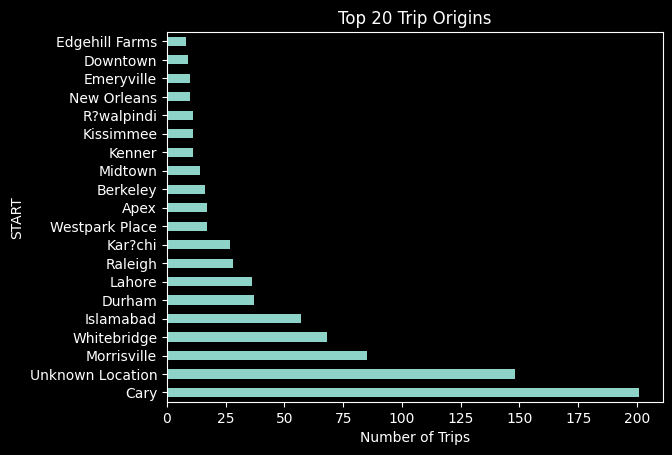

In [26]:
start_counts = df_cleaned['START'].value_counts().head(20)
start_counts.plot(kind='barh', title='Top 20 Trip Origins')
plt.xlabel("Number of Trips")
plt.show()

In [33]:
df_cleaned.groupby('START')['MILES'].mean().sort_values(ascending=False).head(10)

START
Latta            310.30
Jacksonville     187.60
Florence         159.30
Ridgeland        144.00
Asheville        143.85
Austin           136.00
Winston Salem    133.60
Boone            102.00
Daytona Beach     80.50
Hayesville        75.70
Name: MILES, dtype: float64

In [35]:
df_cleaned.groupby('WEEKDAY')['DURATION_MIN'].mean().sort_values(ascending=False)

WEEKDAY
Saturday     27.153333
Friday       25.708738
Thursday     24.415584
Sunday       22.128378
Tuesday      21.994318
Wednesday    21.095238
Monday       19.942529
Name: DURATION_MIN, dtype: float64

In [36]:
df_cleaned.groupby('ROUTE')['DURATION_MIN'].mean().sort_values(ascending=False).head(10)

ROUTE
Latta ➜ Jacksonville         330.0
Morrisville ➜ Banner Elk     206.0
Boone ➜ Cary                 185.0
Asheville ➜ Mebane           181.0
Cary ➜ Latta                 178.0
Jacksonville ➜ Ridgeland     178.0
Jacksonville ➜ Kissimmee     165.0
Kissimmee ➜ Daytona Beach    146.0
Ridgeland ➜ Florence         143.0
Austin ➜ Katy                139.0
Name: DURATION_MIN, dtype: float64

In [30]:
file_path = r"C:\Users\DELL\Downloads\UberDataset.xlsx"
df = pd.read_excel(file_path)
df = df[df['START_DATE'] != 'Totals'] 

df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], errors='coerce')

df_cleaned = df.dropna(subset=['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP'])

df_cleaned['YEAR'] = df_cleaned['START_DATE'].dt.year
df_cleaned['MONTH'] = df_cleaned['START_DATE'].dt.month_name()
df_cleaned['WEEKDAY'] = df_cleaned['START_DATE'].dt.day_name()
df_cleaned['HOUR'] = df_cleaned['START_DATE'].dt.hour

df_cleaned['ROUTE'] = df_cleaned['START'] + " ➜ " + df_cleaned['STOP']

RATE_PER_MILE = 1.5
df_cleaned['ESTIMATED_COST'] = df_cleaned['MILES'] * RATE_PER_MILE

df_cleaned['DURATION_MIN'] = (df_cleaned['END_DATE'] - df_cleaned['START_DATE']).dt.total_seconds() / 60
df_cleaned['SPEED_MPH'] = df_cleaned['MILES'] / (df_cleaned['DURATION_MIN'] / 60)

output_path = r"C:\Users\DELL\Downloads\UberDataset_Enhanced.xlsx"
df_cleaned.to_excel(output_path, index=False)

In [31]:
print("File saved to:", output_path)

File saved to: C:\Users\DELL\Downloads\UberDataset_Enhanced.xlsx
